In [6]:
import numpy as np
import pandas as pd
import xarray as xr
import pickle
import scipy
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
GCP = pd.read_csv("./../../Prelim_Data_Analysis/gcb_data/budget.csv",
                  index_col=0,
                  usecols=[0,4,5,6]
                 )
GCP.head()

,ocean sink,land sink,budget imbalance
Year,,,
1959,0.852376,0.516073,0.860316
1960,0.819017,1.394030,0.522722
1961,0.714842,0.605098,1.213762
1962,0.756709,1.348349,0.959605
1963,0.904997,0.877794,1.355333


In [4]:
GCP['CO2'] = pd.read_csv("./../co2_temp_data/co2/co2_global.csv", index_col=0, header=0)[2:]
GCP['land sink'] = -GCP['land sink']
GCP['ocean sink'] = -GCP['ocean sink']
GCP['budget imbalance'] = -GCP["budget imbalance"] + GCP['land sink']
GCP.rename(columns={"ocean sink": "ocean",
                    "land sink": "land (model)",
                    "budget imbalance": "land"
                   },
           inplace=True)

In [5]:
GCP.head()

,ocean,land (model),land,CO2
Year,,,,
1959,-0.852376,-0.516073,-1.376389,315.486
1960,-0.819017,-1.394030,-1.916752,316.163
1961,-0.714842,-0.605098,-1.818860,316.856
1962,-0.756709,-1.348349,-2.307954,317.558
1963,-0.904997,-0.877794,-2.233127,318.268


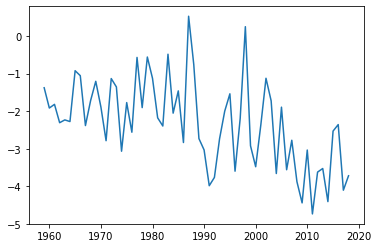

In [7]:
plt.plot(GCP.land)

# Mann-Kendall Test

https://vsp.pnnl.gov/help/Vsample/Design_Trend_Mann_Kendall.htm

Example

In [19]:
# STEP 1
x = np.array([0,3,2,4,3])

In [33]:
# STEP 2

In [20]:
expected_result = [[1,1,1,1], [-1,1,0], [1,1], [-1]]

In [21]:
result = []
for k in range(len(x)):
    sub = []
    for j in range(len(x)):
        if j > k:
            sub.append(np.sign(x[j] - x[k]))
    if len(sub) != 0:
        result.append(sub)

In [22]:
result

[[1, 1, 1, 1], [-1, 1, 0], [1, 1], [-1]]

In [23]:
expected_result == result

True

In [24]:
# create function for step 2
def sgns(x):
    
    result = []
    for k in range(len(x)):
        sub = []
        for j in range(len(x)):
            if j > k:
                sub.append(np.sign(x[j] - x[k]))
        if len(sub) != 0:
            result.append(sub)
    
    return result

In [26]:
sgns(x), sgns(x) == expected_result

([[1, 1, 1, 1], [-1, 1, 0], [1, 1], [-1]], True)

In [ ]:
# STEP 4

In [34]:
expected_sum = 4 + 0 + 2 -1
expected_sum

5

In [42]:
np.sum(np.sum(sgns(x))), np.sum(np.sum(sgns(x))) == expected_sum

(5, True)

Now use on GCP

In [62]:
S = np.sum(np.sum(-GCP.land.values))
S

138.8000555325

In [63]:
# STEP 5: n>10
# STEP 6

In [64]:
unique, counts = np.unique(x, return_counts=True)

tied_groups = []
for count in counts:
    if count > 1:
        tied_groups.append(count)
tied_groups

[2]

In [65]:
[i*(i-1)*(2*i+5) for i in t]

[18]

In [66]:
n = len(x)
t = tied_groups
var_s = (1/18)*(n*(n-1)*(2*n+5)) - (1/18)*np.sum([i*(i-1)*(2*i+5) for i in t])
var_s

15.666666666666664

In [67]:
# STEP 7
S, var_s
# S > 0

(138.8000555325, 15.666666666666664)

In [68]:
Z_mk = (S-1)/np.sqrt(var_s)
Z_mk

34.814574446930365

In [69]:
# positive Z_mk means data tends to increase with time.

In [70]:
# STEP 8: null hypothesis


# Other methods from Stats course